In [1]:
%matplotlib inline

### Load the dataset

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image

plt.ion()   # interactive mode

In [3]:
os.getcwd()

'C:\\Users\\Oliver\\Documents\\Python_Scripts\\479SS_DL\\DATA'

In [4]:
data_dir = 'image'

In [14]:
from torch.utils.data import Dataset, DataLoader

data_transform = transforms.Compose([transforms.RandomRotation(90),
                                     transforms.Resize([256,256]),
                                     transforms.ToTensor()])

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x), transform = data_transform) for x in ['train']}
data_loaders = {x: DataLoader(image_datasets[x],
                              batch_size = 32, 
                              shuffle = True, 
                              num_workers = 0) for x in ['train']}

In [15]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train']}
dataset_sizes

{'train': 7697}

In [16]:
class_names = image_datasets['train'].classes
class_names

['AnneHathaway',
 'DavidBowie',
 'EmiliaClarke',
 'EmmaStone',
 'GalG',
 'HughJ',
 'JasonStatham',
 'JohnnyDepp',
 'LeonardoD',
 'MorganF',
 'Robert',
 'RogerFederer',
 'ScarlletJ',
 'TomCruise',
 'WillS',
 'test']

In [17]:
len(image_datasets['train'])

7697

In [18]:
data_loaders['train']

#### iteration through dataset

In [19]:
train_dataset = image_datasets['train']

In [20]:
#for i in range(2):
#    sample = train_dataset[i]
#    print(sample)
sample = train_dataset[1000]
print(sample[0].size())        #### feature size
sample[1]                      #### label

torch.Size([3, 256, 256])


1

In [21]:
sample[0].numpy().transpose().shape

(256, 256, 3)

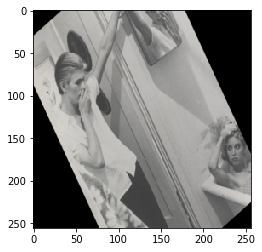

In [22]:
###  plt.imshow need (256*256*3 instead of 3*256*256)
###  it needs color channel to be the last one
plt.imshow(sample[0].numpy().transpose())

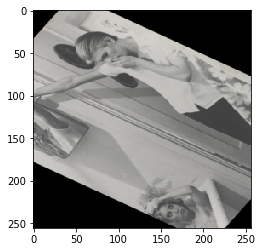

In [23]:
convert_tensor = transforms.ToPILImage()
plt.imshow(convert_tensor(sample[0]))

#### iteration through data_loader

In [7]:
train_loader = data_loaders['train']

In [8]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched[0].size(),sample_batched[1])
    break

C:\Users\Oliver\Anaconda3\lib\site-packages\PIL\Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


0 torch.Size([32, 3, 256, 256]) tensor([1, 1, 5, 1, 0, 3, 5, 5, 2, 1, 0, 0, 5, 5, 1, 2, 5, 1, 0, 2, 1, 0, 3, 1,
        1, 3, 0, 1, 3, 5, 4, 5])


##### check dataset has been loaded correctly

In [9]:
torch.manual_seed(0)

num_epochs = 2
for epoch in range(num_epochs):

    for batch_idx, (x, y) in enumerate(train_loader):
        
        print('Epoch:', epoch+1, end='')
        print(' | Batch index:', batch_idx, end='')
        print(' | Batch size:', y.size()[0])
        

        print('break minibatch for-loop')
        break

Epoch: 1 | Batch index: 0 | Batch size: 32
break minibatch for-loop
Epoch: 2 | Batch index: 0 | Batch size: 32
break minibatch for-loop


In [10]:
for features, labels in train_loader:
    print(features.size(),labels.size())
    break

torch.Size([32, 3, 256, 256]) torch.Size([32])


# Tuned models

In [3]:
res = resnet18
res.fc  = nn.Linear(512, 2)
#res

NameError: name 'nn' is not defined

In [4]:
from torchvision import models
alexnet = models.alexnet(pretrained = True)
resnet18 = models.resnet18()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [28]:
resnet152 = models.resnet152()
inception = models.inception()
inception

TypeError: 'module' object is not callable

In [13]:
for features, labels in train_loader:
    out = alexnet(features)
    print(out.size())
    break

torch.Size([32, 1000])


In [20]:
###  feature extractor
alex_new = nn.Sequential(*list(alexnet.features.children()))
for features, labels in train_loader:
    out = alex_new(features)
    print(out.size())
    break

torch.Size([32, 256, 7, 7])


#### define a new model

In [18]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [23]:
import torch
import torch.nn as nn
from torchvision import models

original_model = models.alexnet(pretrained=True)

class Alex_cus(nn.Module):
            def __init__(self):
                super(Alex_cus, self).__init__()
                self.features = nn.Sequential(
                    *list(alexnet.features.children())[:-3],
                    *list(alexnet.classifier.children())[:-3]
                )
            def forward(self, x):
                x = self.features(x)
                return x

model = Alex_cus()
model

Alex_cus(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Dropout(p=0.5)
    (11): Linear(in_features=9216, out_features=4096, bias=True)
    (12): ReLU(inplace)
    (13): Dropout(p=0.5)
  )
)

In [25]:
for features, labels in train_loader:
    out = model(features)
    print(out.size())
    break

RuntimeError: size mismatch, m1: [122880 x 15], m2: [9216 x 4096] at c:\a\w\1\s\tmp_conda_3.6_062715\conda\conda-bld\pytorch-cpu_1550384979956\work\aten\src\th\generic/THTensorMath.cpp:940

### transform PIL to tensor,  when plt.inshow(),the dimension of tensor need to be set correctly

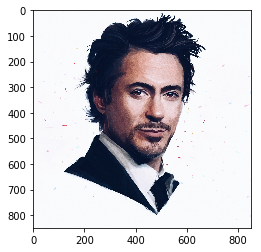

In [9]:
im = Image.open('image/train/Robert/000002.jpg')
plt.imshow(im)

In [3]:
tran  = transforms.ToTensor()

In [4]:
tran(im).size()

torch.Size([3, 850, 850])

In [10]:
tran2 = transforms.Lambda(lambda x: x/255.)

In [11]:
tran2(im)

TypeError: unsupported operand type(s) for /: 'JpegImageFile' and 'float'

In [86]:
plt.inshow(tran(im))

AttributeError: module 'matplotlib.pyplot' has no attribute 'inshow'

In [82]:
tran(im).numpy().transpose().shape

(850, 850, 3)

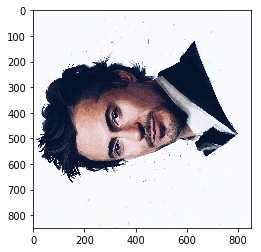

In [83]:
plt.imshow(tran(im).numpy().T)

In [84]:
np.transpose(tran(im).numpy(),axes = (1,2,0)).shape

(850, 850, 3)

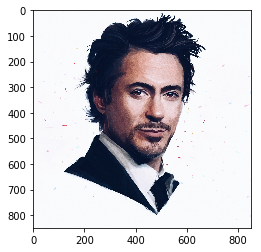

In [85]:
plt.imshow(np.transpose(tran(im).numpy(),axes = (1,2,0)))

In [1]:
from torchvision import models

In [3]:
models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F